## Code in Textbook

In [2]:
%matplotlib inline
import torch
from torch.distributions import multinomial

In [6]:
fair_probs = torch.ones([6]) / 6
multinomial.Multinomial(1, fair_probs).sample()

tensor([0., 0., 0., 0., 1., 0.])

In [9]:
multinomial.Multinomial(100, fair_probs).sample()

tensor([19., 15., 20., 13., 15., 18.])

In [10]:
counts = multinomial.Multinomial(10, fair_probs).sample((3,))
counts

tensor([[0., 3., 0., 3., 2., 2.],
        [3., 2., 1., 1., 2., 1.],
        [0., 2., 0., 3., 2., 3.]])

In [13]:
multinomial.Multinomial(1000000, fair_probs).sample() / 100000

tensor([1.6610, 1.6667, 1.6686, 1.6682, 1.6654, 1.6702])

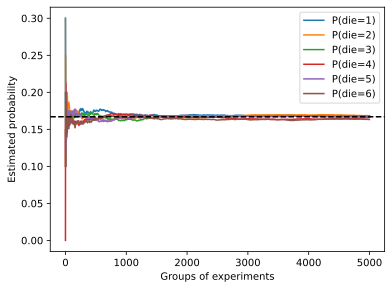

In [16]:
from util import *
import matplotlib.pyplot as plt
counts = multinomial.Multinomial(10, fair_probs).sample((5000,))
cum_counts = counts.cumsum(dim=0)
estimates = cum_counts / cum_counts.sum(dim=1, keepdims=True)

set_figsize((6, 4.5))
for i in range(6):
   plt.plot(estimates[:, i].numpy(),
                 label=("P(die=" + str(i + 1) + ")"))
plt.axhline(y=0.167, color='black', linestyle='dashed')
plt.gca().set_xlabel('Groups of experiments')
plt.gca().set_ylabel('Estimated probability')
plt.legend();

## Exercise

$$ 
P(A\cup B) \in [\min(P(A),P(B)), 1] \\
P(A\cap B) \in [0, \min (P(A),P(B))]
$$

$$
P(A,B,C)=P(A)P(B|A)P(C|B)
$$

I think we can just run the first test the second time, but then the conditional independence may not hold and we may not know the true probability. If conditional independence holds, a second test will improve our confidence to about 0.93.